In [62]:
import tweepy
import numpy as np #IMPORTS
import pandas as pd
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
%matplotlib inline
plt.style.use('fivethirtyeight')
print('done')

done


In [63]:
access_token=''
access_secret=''
consumer_key=''#YOULL HAVE TO INSERT YOUR OWN KEYS HERE
consumer_secret=''
bearer_token=''
client = tweepy.Client(bearer_token)#using api 1 so we only need bearer token for access
print('done')

done


In [64]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
texts=[]
tweets_list = tweepy.Paginator(client.search_recent_tweets,
                               query='"Cybersecurity" "Department of Homeland Security"',
                               tweet_fields=['context_annotations', 'created_at'],
                               max_results=100).flatten(limit=10000)
for tweet in tweets_list:
    texts.append(tweet.text)
   

print('done')

done


In [65]:
df=pd.DataFrame(list(zip(texts)),
               columns=['Text'])
df.head

<bound method NDFrame.head of                                                   Text
0    Russia's cyber threats are placing pressure on...
1    RT @siliconrepublic: Despite ongoing efforts b...
2    Despite ongoing efforts by organisations to pr...
3    RT @APFactCheck: How do we know? The results w...
4    RT @APFactCheck: How do we know? The results w...
..                                                 ...
104  Department of Homeland Security publishes spac...
105  Department of Homeland Security publishes spac...
106  Russia’s Cyber Tactics Are Prompting the FCC t...
107  RT @NewSpaceEconomy: Department of Homeland Se...
108  Department of Homeland Security publishes spac...

[109 rows x 1 columns]>

In [66]:
def cleanUpTweet(txt):
    txt=re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt=re.sub(r'#','',txt)
    txt=re.sub(r'RT :','',txt)
    txt=re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    return txt
df['Clean Text']=df['Text'].apply(cleanUpTweet)

df.head()

,Text,Clean Text
0,Russia's cyber threats are placing pressure on...,Russia's cyber threats are placing pressure on...
1,RT @siliconrepublic: Despite ongoing efforts b...,Despite ongoing efforts by organisations to p...
2,Despite ongoing efforts by organisations to pr...,Despite ongoing efforts by organisations to pr...
3,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...
4,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...


In [67]:
tokenized_text=df['Clean Text'].apply(lambda x: x.split())
tokenized_text.head()

0    [Russia's, cyber, threats, are, placing, press...
1    [Despite, ongoing, efforts, by, organisations,...
2    [Despite, ongoing, efforts, by, organisations,...
3    [How, do, we, know?, The, results, were, subje...
4    [How, do, we, know?, The, results, were, subje...
Name: Clean Text, dtype: object

In [68]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
tokenized_text=tokenized_text.apply(lambda x: [stemmer.stem(word) for word in x])
tokenized_text.head()

0    [russia', cyber, threat, are, place, pressur, ...
1    [despit, ongo, effort, by, organis, to, protec...
2    [despit, ongo, effort, by, organis, to, protec...
3    [how, do, we, know?, the, result, were, subjec...
4    [how, do, we, know?, the, result, were, subjec...
Name: Clean Text, dtype: object

In [69]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['Clean Text'].apply(getSubjectivity)
df['Polarity']=df['Clean Text'].apply(getPolarity)
df

,Text,Clean Text,Subjectivity,Polarity
0,Russia's cyber threats are placing pressure on...,Russia's cyber threats are placing pressure on...,0.416667,0.250000
1,RT @siliconrepublic: Despite ongoing efforts b...,Despite ongoing efforts by organisations to p...,1.000000,0.000000
2,Despite ongoing efforts by organisations to pr...,Despite ongoing efforts by organisations to pr...,0.727273,0.068182
3,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333
4,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333
...,...,...,...,...
104,Department of Homeland Security publishes spac...,Department of Homeland Security publishes spac...,0.000000,0.000000
105,Department of Homeland Security publishes spac...,Department of Homeland Security publishes spac...,0.000000,0.000000
106,Russia’s Cyber Tactics Are Prompting the FCC t...,Russia’s Cyber Tactics Are Prompting the FCC t...,0.000000,0.000000
107,RT @NewSpaceEconomy: Department of Homeland Se...,Department of Homeland Security publishes spa...,0.000000,0.000000


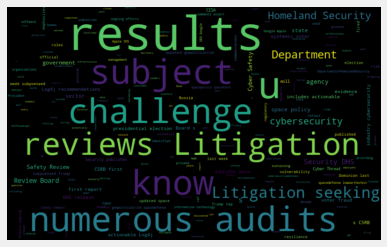

In [70]:
allWords=' '.join([sentence for sentence in df['Clean Text']])
wordCloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
def getAnalysis(score):
    if score <0:
        return 0
    if score ==0:
        return 2
    elif score>0:
        return 1

#we dont need the neutral, but we have to assign it a value for now since we cannot have NaN values
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Text,Clean Text,Subjectivity,Polarity,Analysis
0,Russia's cyber threats are placing pressure on...,Russia's cyber threats are placing pressure on...,0.416667,0.250000,1
1,RT @siliconrepublic: Despite ongoing efforts b...,Despite ongoing efforts by organisations to p...,1.000000,0.000000,2
2,Despite ongoing efforts by organisations to pr...,Despite ongoing efforts by organisations to pr...,0.727273,0.068182,1
3,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
4,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
...,...,...,...,...,...
104,Department of Homeland Security publishes spac...,Department of Homeland Security publishes spac...,0.000000,0.000000,2
105,Department of Homeland Security publishes spac...,Department of Homeland Security publishes spac...,0.000000,0.000000,2
106,Russia’s Cyber Tactics Are Prompting the FCC t...,Russia’s Cyber Tactics Are Prompting the FCC t...,0.000000,0.000000,2
107,RT @NewSpaceEconomy: Department of Homeland Se...,Department of Homeland Security publishes spa...,0.000000,0.000000,2


In [72]:
df.drop(df[(df['Analysis'] >1)].index, inplace=True)
df
df.to_csv('database.csv')
#here we filter out all neutral results, this admittedly took much longer than it should to figure out
#i kept trying to index through the database, but pandas has a specific command that does it for me and would not allow me to do it any other way

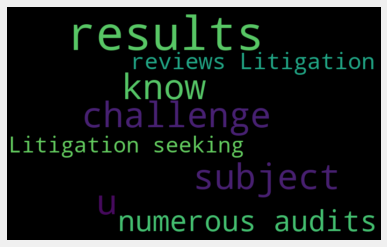

In [73]:
allWords=' '.join([sentence for sentence in df['Clean Text'][df['Analysis']==0]])
wordCloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(allWords)
#POS WORDS
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#prints most used negative words

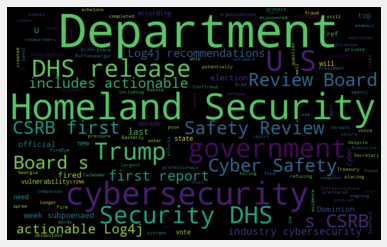

In [74]:
allWords=' '.join([sentence for sentence in df['Clean Text'][df['Analysis']==1]])
wordCloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(allWords)
#POS WORDS
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#prints most used positive words

In [75]:
def hashtag_extract(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r'#(\w+)',tweet)
        hashtags.append(ht)
    return hashtags

In [76]:
ht_positive=hashtag_extract(df['Text'][df['Analysis']==1])
ht_negative=hashtag_extract(df['Text'][df['Analysis']==0])

In [77]:
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

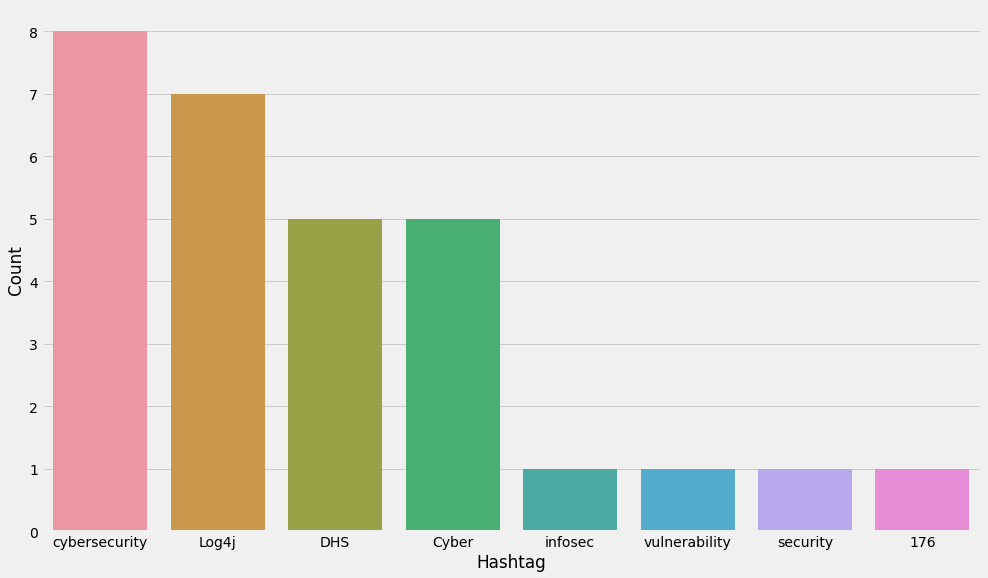

In [78]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag': list(freq.keys()),'Count': list(freq.values())})
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()
#prints most used positive hashtags

In [80]:
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag': list(freq.keys()),'Count': list(freq.values())})
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()
#prints most used negative hashtags

ValueError: min() arg is an empty sequence

<Figure size 1080x648 with 0 Axes>

In [82]:
print('Positive Hashtags: ')
for x in ht_positive:
    print(x)
print('')
print('Negative Hashtags: ')
for x in ht_negative:
    print(x)

Positive Hashtags: 
cybersecurity
Log4j
cybersecurity
infosec
vulnerability
security
cybersecurity
Log4j
DHS
Cyber
Log4j
cybersecurity
DHS
Cyber
Log4j
cybersecurity
DHS
Cyber
Log4j
cybersecurity
DHS
Cyber
Log4j
cybersecurity
DHS
Cyber
Log4j
cybersecurity
176

Negative Hashtags: 


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['Clean Text'])
#here we split the tweets into individual words

In [84]:
#bow[0].toarray()

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['Analysis'],random_state=42,test_size=0.25)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [87]:
model=LogisticRegression()
df.fillna(df.mean(), inplace=True)
model.fit(x_train,y_train)


C:\Users\Lando\AppData\Local\Temp\ipykernel_21436\2527784994.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


LogisticRegression()

In [88]:
pred=model.predict(x_test)
print("F1 Score : ",f1_score(y_test, pred,average='micro'))
print("Accuracy Score : ", accuracy_score(y_test, pred))
#the scores are very high which means the library we used did a great job classifying the text

F1 Score :  1.0
Accuracy Score :  1.0


In [89]:
pred_prob=model.predict_proba(x_test)
f1_score(y_test, pred)

1.0

In [90]:
df[df['Analysis'] > 0]
#positive tweets:


,Text,Clean Text,Subjectivity,Polarity,Analysis
0,Russia's cyber threats are placing pressure on...,Russia's cyber threats are placing pressure on...,0.416667,0.250000,1
2,Despite ongoing efforts by organisations to pr...,Despite ongoing efforts by organisations to pr...,0.727273,0.068182,1
6,A computer #vulnerability discovered last year...,A computer vulnerability discovered last year ...,0.505303,0.159091,1
26,U.S. Department of Homeland Security (#DHS) re...,U.S. Department of Homeland Security (DHS) rel...,0.333333,0.250000,1
34,U.S. Department of Homeland Security (#DHS) re...,U.S. Department of Homeland Security (DHS) rel...,0.333333,0.250000,1
35,U.S. Department of Homeland Security (#DHS) re...,U.S. Department of Homeland Security (DHS) rel...,0.333333,0.250000,1
39,U.S. Department of Homeland Security (#DHS) re...,U.S. Department of Homeland Security (DHS) rel...,0.333333,0.250000,1
41,U.S. Department of Homeland Security (#DHS) re...,U.S. Department of Homeland Security (DHS) rel...,0.333333,0.250000,1
47,There is no evidence of systemic voter fraud i...,There is no evidence of systemic voter fraud i...,0.487500,0.137500,1
95,RT @SenateCloakroom: Confirmed by voice vote: ...,Confirmed by voice vote: Executive Calendar 1...,1.000000,0.400000,1


In [91]:
df[df['Analysis'] < 1]
#negative tweets:



,Text,Clean Text,Subjectivity,Polarity,Analysis
3,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
4,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
5,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
7,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
8,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
...,...,...,...,...,...
85,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
86,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
87,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0
88,RT @APFactCheck: How do we know? The results w...,How do we know? The results were subject to n...,0.416667,-0.083333,0


In [92]:
#positive percentage
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Text']
print(ptweets)
round((ptweets.shape[0]/df.shape[0])*100,1)

Series([], Name: Text, dtype: object)


0.0

In [93]:
#negative percentage
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Text']
print(ntweets)
round((ntweets.shape[0]/df.shape[0])*100,1)

Series([], Name: Text, dtype: object)


0.0

In [94]:
#neutral percentage
netweets=df[df.Analysis=='Neutral']
netweets=netweets['Text']
print(netweets)
round((netweets.shape[0]/df.shape[0])*100,1)

Series([], Name: Text, dtype: object)


0.0

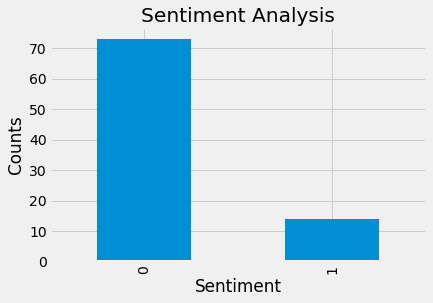

In [95]:
#show the value counts
df['Analysis'].value_counts()
#plot and visualize
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

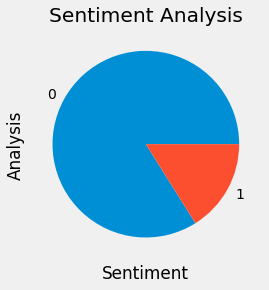

In [96]:
#show the value counts
df['Analysis'].value_counts()
#plot and visualize
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()

<AxesSubplot:xlabel='Subjectivity', ylabel='Polarity'>

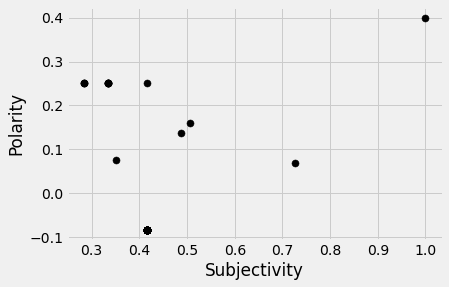

In [97]:
df.plot.scatter(x = 'Subjectivity', y = 'Polarity', s=50, c='black')

#the lack of dots on here indicate that most of the items have the same
#polarity and subjectivity,we can easily manually check this with our csv file
#the cause of this is most likely that a large number of our tweets are retweeted
#maybe i should find a way to remove all retweets, it wouldnt be hard but our sample
#size would shrink big time unless i created a recursive function to gain more tweets
#but that just sounds like a lot of work


In [98]:
# 